
## Загрузка и подготовка данных

Привет! Можешь посмотреть, что не так, не получилось установить pandas-profiling. Мои попытки в закоментированных строках.

In [1]:
!pip install -U pip scikit-learn seaborn pandas scipy
# !python -m pip install -r https://raw.githubusercontent.com/pandas-profiling/pandas-profiling/master/requirements.txt
# !python -m pip install -U pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# !pip install pandas-profiling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

In [5]:
from collections import namedtuple
from scipy import stats as st

In [6]:
# Settings
sns.set_theme()

Уникальных id: 99990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
9044,ZJ1Kl,0.702683,0.640172,-0.988516,29.253703
50860,7dITr,1.629738,-0.063553,5.134798,143.300000
34433,nVt9x,0.059494,0.119591,3.076257,99.387797
85172,DOMFo,0.483475,-0.252605,4.337708,110.535345
22763,JYpQr,-0.795128,0.584563,-4.046503,33.198016
81621,ETSCV,2.000000,0.252980,7.890732,134.377827
81041,DcvzS,0.060865,0.059526,1.222525,116.363075
64016,ukAG2,1.323982,-0.516842,0.345001,117.217857
15307,Xap0J,0.125338,1.146007,-0.623006,31.449050
36401,6gnxt,1.756004,-0.427646,-3.620162,85.226594


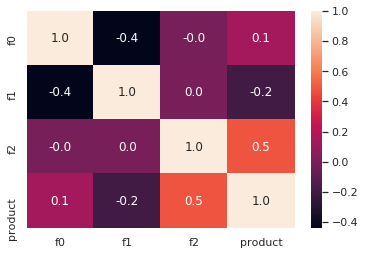

In [7]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

sns.heatmap(geo_data_0.corr(), annot=True, fmt='.1f')
print("Уникальных id:", geo_data_0['id'].nunique())
print(geo_data_0.info())
geo_data_0.sample(n=10)

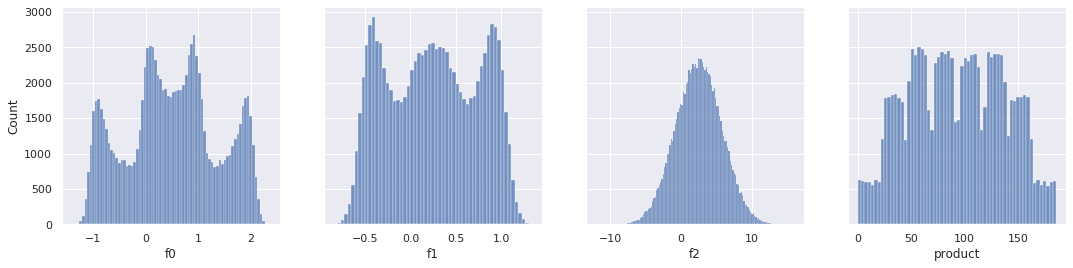

In [8]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(18,4))
cols = ['f0', 'f1', 'f2', 'product']
for col, ax in zip(cols, axes):
    sns.histplot(geo_data_0[col], ax=ax)
print(end='')

Уникальных id: 99996
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
6885,eI1tq,7.693971,-5.978254,2.991309,80.859783
64207,jPlZZ,-4.458205,-7.900038,3.003702,84.038886
54568,ZyYFY,4.925791,-7.093698,-0.002578,0.000000
59644,ojWXA,9.275819,0.505240,3.009283,80.859783
56886,d9VDT,-3.070858,-8.904236,4.002526,110.992147
42359,hdA7M,13.913504,0.810382,1.998654,53.906522
77771,b52Ov,-11.005161,-7.775013,5.000906,137.945408
8379,H66CM,-11.413440,-7.331174,5.000960,137.945408
54459,yYLP5,-0.639323,-10.303140,1.993778,57.085625
56374,0GL5N,10.738002,-10.550286,0.003511,0.000000


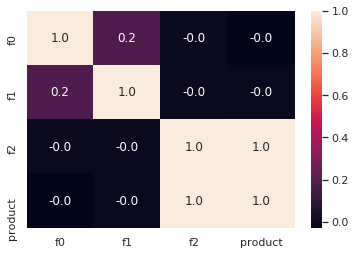

In [9]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

sns.heatmap(geo_data_1.corr(), annot=True, fmt='.1f')
print("Уникальных id:", geo_data_1['id'].nunique())
print(geo_data_1.info())
geo_data_1.sample(n=10)

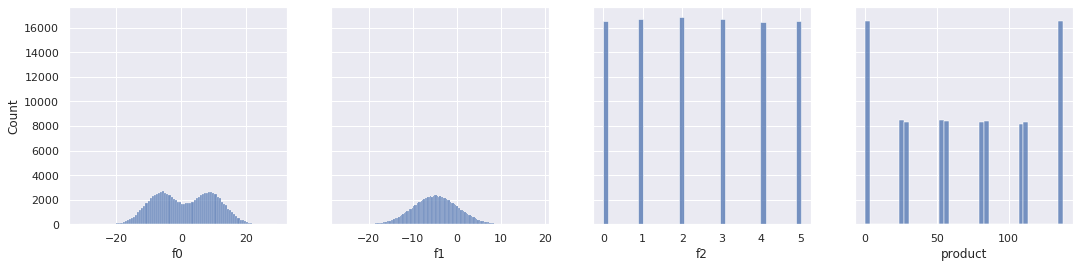

In [10]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(18,4))
cols = ['f0', 'f1', 'f2', 'product']
for col, ax in zip(cols, axes):
    sns.histplot(geo_data_1[col], ax=ax)
print(end='')

Уникальных id: 99996
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
30435,lqASp,-2.812669,1.121833,4.620953,71.884974
2942,RYEuj,-1.239701,-0.856080,1.295233,37.593353
86260,NXNJ2,1.380545,0.000827,0.320116,129.769228
24271,ZOeMI,0.590358,-0.976945,3.251818,79.920389
6730,gG6Sc,1.719821,1.728666,3.280528,91.571684
96513,EP6jf,-0.098105,2.880913,5.815310,165.870402
72491,Jx2sL,-0.468836,-1.141810,-0.316200,69.575918
33847,Yha31,0.557361,-0.408217,3.498697,137.183621
93458,KOa3O,-4.221608,-0.597586,9.023050,161.845701
1013,FsIkj,-1.950782,-0.389381,3.956997,50.994745


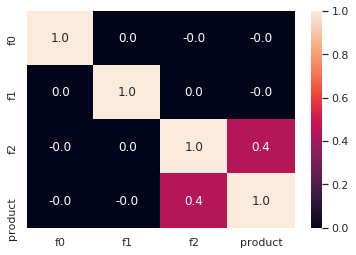

In [11]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

sns.heatmap(geo_data_2.corr(), annot=True, fmt='.1f')
print("Уникальных id:", geo_data_2['id'].nunique())
print(geo_data_2.info())
geo_data_2.sample(n=10)

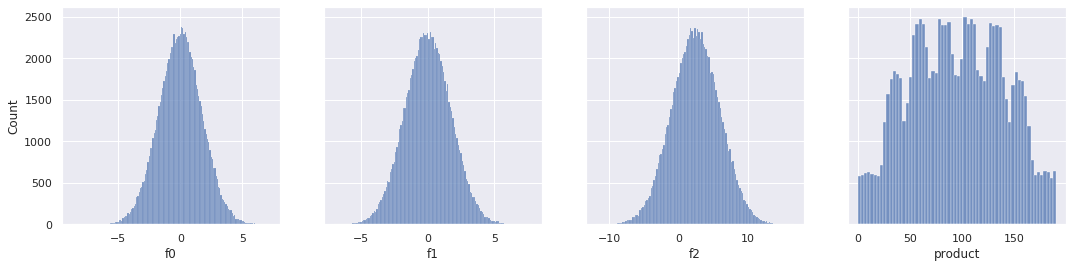

In [12]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(18,4))
cols = ['f0', 'f1', 'f2', 'product']
for col, ax in zip(cols, axes):
    sns.histplot(geo_data_2[col], ax=ax)
print(end='')

**Выводы**

- Все данные на месте, одна строка - одно наблюдение. Все наблюдения уникальны (дуликаты id - *разные* наблюдения одной скважины).
- Во всех выборках признаки f2 и product скоррелированы со значениями коэффициента из набора (0.5, 1, 0.4) в соответсвии с порядком загрузки данных. Это замечательно! Значит между целевым и независимым признаками может быть линейная связь. Плюсик в пользу лиейной регрессионной модели.
- Распределения признаков во всех регионах разные, без скосов и выбросов. Что оправдывает обучение отдельной модлели на каждый регион.

## Обучение и проверка модели

In [13]:
def rmse(y_true, y_pred, **kwargs):
    """Returns RMSE metric. Wraps sklearn mean_squared_error"""
    return mean_squared_error(y_true, y_pred, squared=False, **kwargs)

class RegionEstimator:
    """Help class for collecting, storing and calculate data by regions."""
    def __init__(self, df, metric, drop_cols:list=[], metric_name:str=''):
        """Returns RegionEstimator instance.
        
        Parameters
        ----------
        df : pandas.DataFrame
            Region data. Assume that data consists of preprocessed 
            numeric values only and last column is target.
        metric : callable
            Metric to estimate model score with definition func(y_pred, y_true).
        drop_cols : list
            List of columns to drop from data.
        metric_name : str
            String name of metric to print.
        """
        # Dataset
        self.data = pd.DataFrame(df).drop(columns=drop_cols)
        
        # sklearn estimator
        self.model = make_pipeline(
            StandardScaler(), 
            # LinearRegression(positive=True)
            # Ridge(random_state=12345)
            RidgeCV(cv=5)
        )
        
        # Smaples
        self.X = namedtuple('Features', ['train', 'test'])._make([self.data.iloc[:, :-1], None])
        self.y = namedtuple('Target', ['train', 'test'])._make([self.data.iloc[:, -1], None])
        
        # Predictions
        self.predictions = namedtuple('Predictions', ['train', 'test'])._make([None, None])
        
        # Scores
        self.metric = metric
        self.metric_name = str(metric_name)
        self.scores = namedtuple('Score', ['train', 'test'])._make([None, None])
        
        # Flags
        self.__splitted = False
        self.__fitted = False
        self.__prepared = False
        
        # Constants
        self.rub_for_mbarrel = 450
        
    def train_test_split(self,  
                         train_size=None, 
                         test_size=.25, 
                         random_state=12345, 
                         shuffle=True, 
                         stratify=None):
        """Split data on train, test sets wich stored by instance"""
        X_train, X_test, y_train, y_test = train_test_split(
            self.data.iloc[:, :-1], self.data.iloc[:, -1],
            train_size=train_size,
            test_size=test_size,
            random_state=random_state,
            stratify=stratify,
            shuffle=shuffle,
        )
        self.X = self.X._replace(train=X_train, test=X_test)
        self.y = self.y._replace(train=y_train, test=y_test)
        
        self.__splitted = True
        
    def fit(self):
        """Fit the model. If test set is not defined, then model 
        being fitted on whole dataset."""
        self.model.fit(self.X.train, self.y.train)
        self.__fitted = True
        # print("Estimator fitted.")
    
    def get_predictions(self):
        """Make predictions."""
        if not self.__fitted:
            raise Exception("Estimator doesn't fitted yet.")
            
        pred_train = self.model.predict(self.X.train)
        # Predicted values have the same indices as target values
        pred_train = pd.Series(pred_train, dtype=np.float, index=self.y.train.index)
        
        if self.__splitted:
            pred_test = self.model.predict(self.X.test)
            # Predicted values have the same indices as target values
            pred_test = pd.Series(pred_test, dtype=np.float, index=self.y.test.index)
        else:
            print("WARNING: Test sample doesn't set. Split the data before fitting!")
            pred_test = None
        
        self.predictions = self.predictions._replace(train=pred_train, test=pred_test)
        
    def get_scores(self):
        """Gets scores."""
        if self.predictions.train is None:
            raise Exception("Train predictions doesn't exists.")
        
        score_train = self.metric(self.predictions.train, self.y.train)
        if self.__splitted and self.predictions.test is not None:
            score_test = self.metric(self.predictions.test, self.y.test)
        else:
            print("WARNING: Test predictions doesn't exists.")
            score_test = None
        
        self.scores = self.scores._replace(train=score_train, test=score_test)
        
        self.__prepared = True

    @property
    def summary(self):
        """Print summary info after fitting the model."""
        if not self.__prepared:
            print("Info doesn't exists. Split, fit, predict and calculate scores before.")
            return

        pred_means = (
            np.mean(preds) for preds in self.predictions 
            if preds is not None
        )
        true_means = (
            np.mean(y) for y in self.y 
            if y is not None
        )
        
        collection = [['train', 'test'], self.scores, pred_means, true_means]
        for name, score, p_mean, y_mean in zip(*collection):
            print(
                "Выборка: {}".format(name),
                "  {}: {:.2f}".format(self.metric_name, score), 
                "  Cредний запас предсказанного сырья: {:.2f} тыс. баррелей".format(p_mean),
                "  Cредний запас сырья: {:.2f} тыс. баррелей".format(y_mean),
                sep='\n'
            )

In [14]:
def sing_plot(ax, title, xlabel, ylabel):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    print(end='')

In [15]:
overview_sign = {
    'title' : "Гистограмма предсказанных объемов", 
    'xlabel': "Объем нефти (тыс. баррелей)", 
    'ylabel': "Количество скважин"
}

                                    Регион 0                                    
Выборка: train
  RMSE: 37.73
  Cредний запас предсказанного сырья: 92.64 тыс. баррелей
  Cредний запас сырья: 92.64 тыс. баррелей
Выборка: test
  RMSE: 37.58
  Cредний запас предсказанного сырья: 92.59 тыс. баррелей
  Cредний запас сырья: 92.08 тыс. баррелей


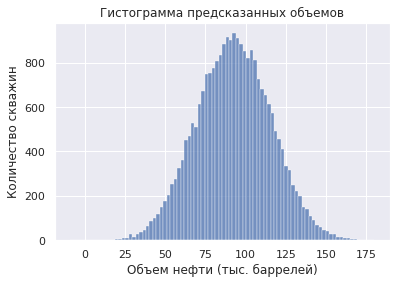

In [16]:
print("{: ^80}".format("Регион 0"))
est_reg_0 = RegionEstimator(geo_data_0, rmse, drop_cols=['id'], metric_name='RMSE')
est_reg_0.train_test_split()
est_reg_0.fit()
est_reg_0.get_predictions()
est_reg_0.get_scores()
est_reg_0.summary
ax = sns.histplot(est_reg_0.predictions.test)
sing_plot(ax, **overview_sign)

                                    Регион 1                                    
Выборка: train
  RMSE: 0.89
  Cредний запас предсказанного сырья: 68.86 тыс. баррелей
  Cредний запас сырья: 68.86 тыс. баррелей
Выборка: test
  RMSE: 0.89
  Cредний запас предсказанного сырья: 68.73 тыс. баррелей
  Cредний запас сырья: 68.72 тыс. баррелей


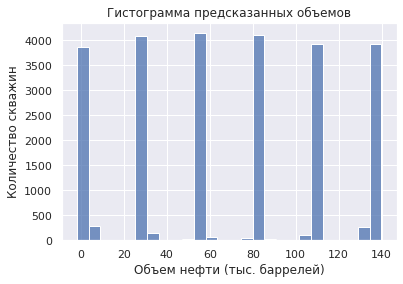

In [17]:
print("{: ^80}".format("Регион 1"))
est_reg_1 = RegionEstimator(geo_data_1, rmse, drop_cols=['id'], metric_name='RMSE')
est_reg_1.train_test_split()
est_reg_1.fit()
est_reg_1.get_predictions()
est_reg_1.get_scores()
est_reg_1.summary
ax = sns.histplot(est_reg_1.predictions.test)
sing_plot(ax, **overview_sign)

                                    Регион 2                                    
Выборка: train
  RMSE: 40.06
  Cредний запас предсказанного сырья: 95.04 тыс. баррелей
  Cредний запас сырья: 95.04 тыс. баррелей
Выборка: test
  RMSE: 40.03
  Cредний запас предсказанного сырья: 94.97 тыс. баррелей
  Cредний запас сырья: 94.88 тыс. баррелей


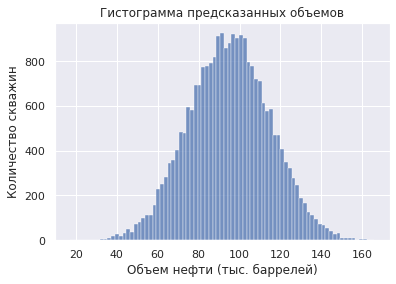

In [18]:
print("{: ^80}".format("Регион 2"))
est_reg_2 = RegionEstimator(geo_data_2, rmse, drop_cols=['id'], metric_name='RMSE')
est_reg_2.train_test_split()
est_reg_2.fit()
est_reg_2.get_predictions()
est_reg_2.get_scores()
est_reg_2.summary
ax = sns.histplot(est_reg_2.predictions.test)
sing_plot(ax, **overview_sign)

**Выводы**

Показатели моделей по регионам на тестовой выборке:

Регион|1|2|3
---|---|---|---
0|37.58|92.59|92.08
1|0.89|68.73|68.72
2|40.03|94.97|94.88

1. RMSE
2. Cредний запас предсказанного сырья
3. Cредний запас сырья

- Значение RMSE можно понимать как некий показатель разброса ошибок модели в тысячах баррелей. Т.е. насколько примерно тысяч баррелей модель может ошибаться. В этом смысле лучшая модель определена в регионе 1.
- Средние значения целевого признака и предсказаний практически одинаковы. Типичного представителя все наши модели умеют определять. 
- Среднее количество запасов сырья во регионе 1 меньше, чем у остальных примерно на 25 тыс. баррелей.

Далее оценим возможную прибыль для каждого региона, чтобы выбрать места для инвестиций.

## Подготовка к расчёту прибыли

Для подготовки к расчетам определим несколько костант из условия

In [19]:
BUDGET = 10_000_000 # тыс.руб. Бюджет на разработку
UNIT_COST = 450. # тыс.руб. Стоимость одной единицы сырья (тыс. баррелей).
WELLS_COUNT = 500 # Количество скважин на рассматрение
WELLS_REVIEW = 200 # Количество наболее объемных скважин
THRESHOLD_LOWER = .025 # Ограничение вероятности убытков
THRESHOLD_HIGHER = .975 # Сверхприбыль

In [20]:
STATE = np.random.RandomState(12345)

In [21]:
def repr_money(money, label="тыс.руб."):
    money = float(money)
    return "{:,.2f} {}".format(money, label).strip()

Подсчитаем какой минимальный объем нефти должнен быть в каждой скважине чтобы покрыть расходы на их разработку по формуле:
$\mathbf{\text{Объем скважины}}=
\frac{\mathbf{\text{Бюджет}}}
{\mathbf{\text{Цена за единицу}}\star
 \mathbf{\text{Количество сырья}}}$

In [22]:
print(
    "Достаточный объём сырья для безубыточной разработки новой скважины:",
    repr_money(
        BUDGET/(UNIT_COST*WELLS_REVIEW), 
        label='тыс.баррелей'
    )
)


Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей


**Выводы**

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей. Что превышает все средние объемы скважин по регионам. Но в жизни скважины разные, и маленького и большого объема. Попробуем оценить возможную прибыль по регионам.

## Расчёт прибыли и рисков 

<img src="https://invest4all.ru/wp-content/uploads/2016/08/srubit-babok.jpg" width="200"/>

С помощью техники BootStrap построим выборку случайных прибылей. Действовать будем так: 
- Опишем функцию для расчета прибыли по 200 наиболее объемным скважинам на основе предсказаний моделей.
- Опишем функцию генерации 1000 выборок в 500 скважин из прогнозов моделей на тестовых данных и реальных показателей объемов запасов тех же скважин. Таким образом, мы искусственно создадим ситуацию, как если бы у нас были незнакомые ранее данные, на которых мы бы строили прогнозы, но, при этом, у нас есть реальные данные, по которым мы можем оценить качество модели и дать рекомендации для выбора региона.
- Для каждой выборки в 500 скважин подсчитаем прибыль с 200 лучших скважин отобранных на основе предсказаний по формуле: 
$\mathbf{\text{Прибыль}}=
\mathbf{\text{Цена за единицу}}*\
{\mathbf{\text{Количество сырья}}-\
 \mathbf{\text{Бюджет}}}$
- Для полученных прибылей (1000 штук) оценим среднее, построим доверительный интервал для среднего и оценим минимум сырья, относительно которого прибыль может быть ниже с вероятностью 2.5% (2.5%-процентиль).
- Среднее значение по выборке прибылей - это оценка прибыли в среднем. Это значит, что реальность еще может быть опасней или полезней.
- Доверительный интервал укажет оценку значений между которыми с вероятностью 95% будет находится прибыль в среднем.
- 2.5%-процентиль даст оценку нижней границы прибыли, меньше которой маловероятно упасть. Если значение будет отрицательным - значит есть шансы на убытки, а если положительным - скорее всего заработаем. 

In [23]:
def get_revenue(predictions, target, unit_cost=UNIT_COST, count=WELLS_REVIEW, budget=BUDGET):
    global resources
    best_wells_pred = predictions.sort_values(ascending=False)#.iloc[:count]
    best_wells_true = target.loc[best_wells_pred.index][:count]
    
    revenue = unit_cost * best_wells_true.sum() - budget

    return np.round(revenue, decimals=2)

In [24]:
def bootstrap(predictions, target, state=STATE, n_samples=1000, n_count=WELLS_COUNT):
    values = []
    for _ in range(n_samples):
        
        subtarget = target.sample(n=n_count, random_state=state)
        subpreds = predictions.loc[subtarget.index]
        
        values.append(
            get_revenue(subpreds, subtarget)
        )
        
    return pd.Series(values)

In [25]:
def get_risk(revenues):
    risks = sum(1 for money in revenues if money < 0)
    return risks/len(revenues)

In [26]:
def draw_lines(ax, mean, true_conf_int, pred_conf_int):
    # Еще формат xticks поправим по дороге
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f} МЛН.'.format(x//1e3)))

    ax.axvline(x=mean, color='darkgreen', label='Средняя выручка', linewidth=4)

    ax.axvline(x=true_conf_int[0], color='red', label='ДИ средней выручки')
    ax.axvline(x=true_conf_int[1], color='red')

    ax.axvline(x=pred_conf_int[0], color='darkorange', label='ДИ прогноза')
    ax.axvline(x=pred_conf_int[1], color='darkorange')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [27]:
revenue_sign={
    'title' : "Гистограмма выручек BootStrap",
    'xlabel': "Выручка",
    'ylabel': "Количество испытаний"
}

                                    Регион 0                                    
Средняя выручка: 380,758.57 тыс.руб.
95% доверительный интервал для средней выручки: (364,674.58; 396,842.57) тыс.руб.
95-% интервал прогноза: (-126,947.64; 879,613.97) тыс.руб.
Процент рисков: 7.20%


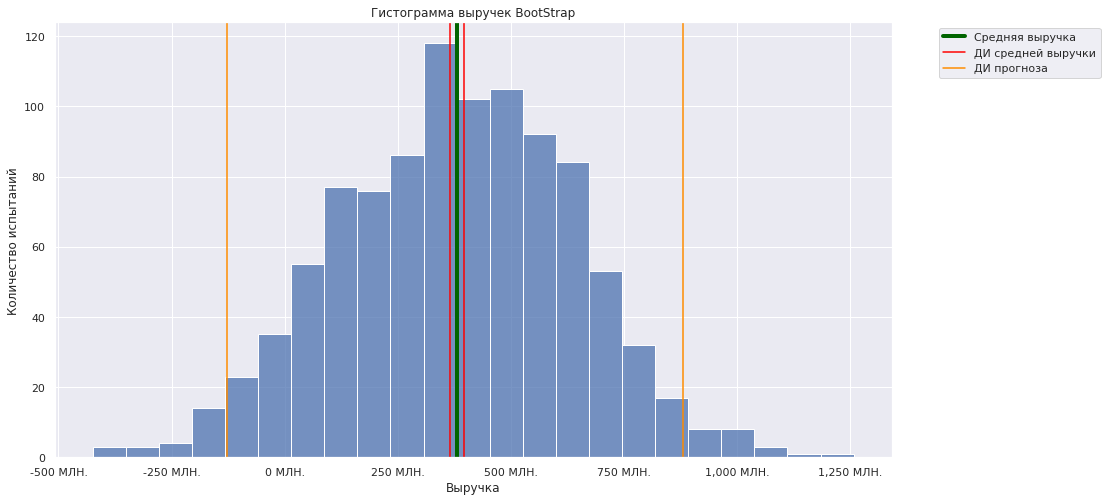

In [28]:
print("{: ^80}".format("Регион 0"))
resources = []
revenues_0 = bootstrap(est_reg_0.predictions.test, est_reg_0.y.test)
true_confidence_interval_0 = st.t.interval(.95, len(revenues_0)-1, revenues_0.mean(), revenues_0.sem())
pred_confidence_interval_0 = (revenues_0.quantile(THRESHOLD_LOWER), revenues_0.quantile(THRESHOLD_HIGHER))

plt.figure(figsize=(15,8))
ax = sns.histplot(data=revenues_0)
sing_plot(ax, **revenue_sign)
draw_lines(ax, revenues_0.mean(), true_confidence_interval_0, pred_confidence_interval_0)

print("Средняя выручка:", repr_money(revenues_0.mean()))
print(
    "95% доверительный интервал для средней выручки:", 
    "({:,.2f}; {:,.2f}) тыс.руб.".format(*true_confidence_interval_0)
)
print("95-% интервал прогноза:", 
      "({:,.2f}; {:,.2f}) тыс.руб.".format(*pred_confidence_interval_0))
print("Процент рисков: {:.2%}".format(get_risk(revenues_0)))

                                    Регион 1                                    
Средняя выручка: 454,785.43 тыс.руб.
95% доверительный интервал для средней выручки: (441,979.24; 467,591.63) тыс.руб.
95-% интервал прогноза: (46,730.08; 840,213.35) тыс.руб.
Процент рисков: 1.30%


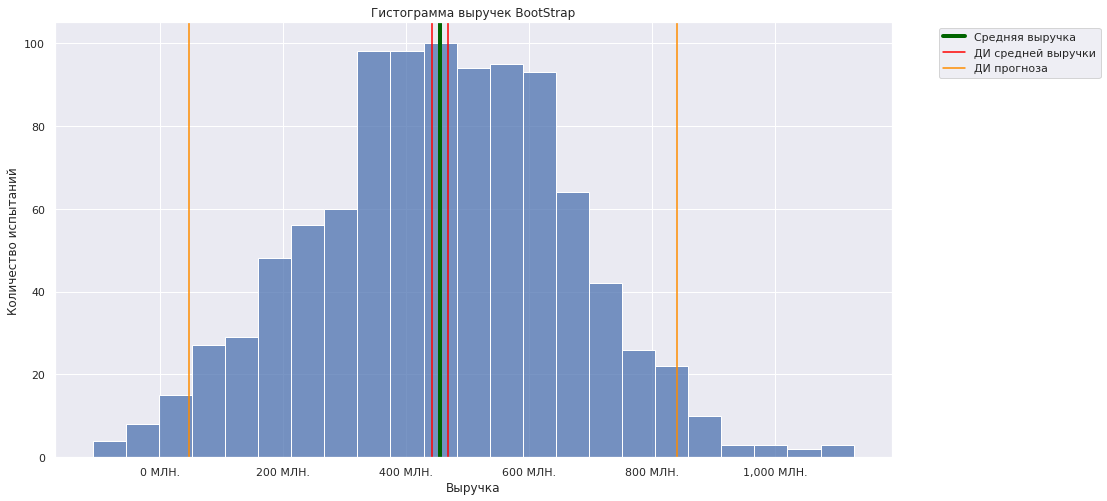

In [29]:
print("{: ^80}".format("Регион 1"))
revenues_1 = bootstrap(est_reg_1.predictions.test, est_reg_1.y.test)
true_confidence_interval_1 = st.t.interval(.95, len(revenues_1)-1, revenues_1.mean(), revenues_1.sem())
pred_confidence_interval_1 = (revenues_1.quantile(THRESHOLD_LOWER), revenues_1.quantile(THRESHOLD_HIGHER))

plt.figure(figsize=(15,8))
ax = sns.histplot(revenues_1)
sing_plot(ax, **revenue_sign)
draw_lines(ax, revenues_1.mean(), true_confidence_interval_1, pred_confidence_interval_1)

print("Средняя выручка:", repr_money(revenues_1.mean()))
print(
    "95% доверительный интервал для средней выручки:", 
    "({:,.2f}; {:,.2f}) тыс.руб.".format(*true_confidence_interval_1)
)
print("95-% интервал прогноза:", 
      "({:,.2f}; {:,.2f}) тыс.руб.".format(*pred_confidence_interval_1))
print("Процент рисков: {:.2%}".format(get_risk(revenues_1)))

                                    Регион 2                                    
Средняя выручка: 389,217.07 тыс.руб.
95% доверительный интервал для средней выручки: (372,857.73; 405,576.42) тыс.руб.
95-% интервал прогноза: (-115,609.57; 906,512.59) тыс.руб.
Процент рисков: 7.30%


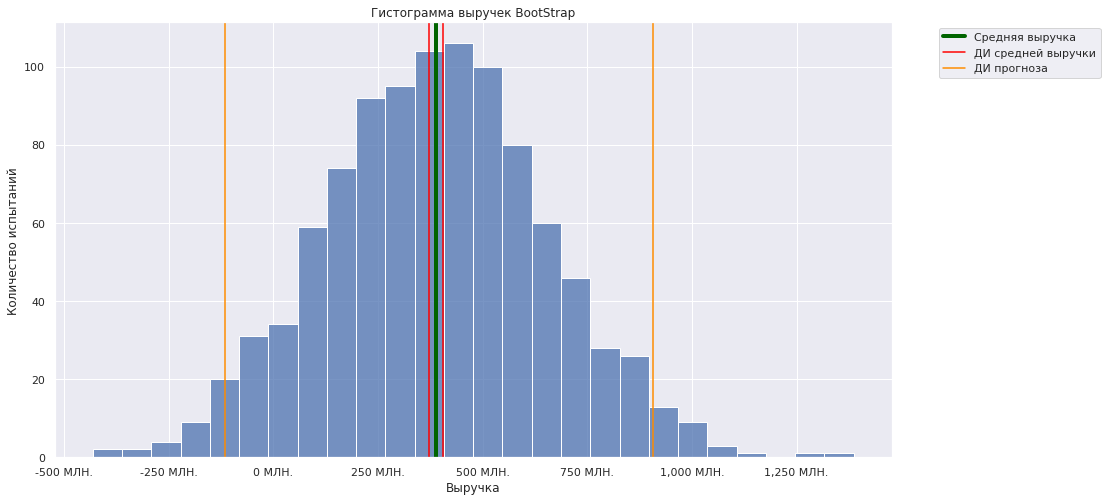

In [30]:
print("{: ^80}".format("Регион 2"))
revenues_2 = bootstrap(est_reg_2.predictions.test, est_reg_2.y.test)
true_confidence_interval_2 = st.t.interval(.95, len(revenues_2)-1, revenues_2.mean(), revenues_2.sem())
pred_confidence_interval_2 = (revenues_2.quantile(THRESHOLD_LOWER), revenues_2.quantile(THRESHOLD_HIGHER))

plt.figure(figsize=(15,8))
ax = sns.histplot(revenues_2)
sing_plot(ax, **revenue_sign)
draw_lines(ax, revenues_2.mean(), true_confidence_interval_2, pred_confidence_interval_2)

print("Средняя выручка:", repr_money(revenues_2.mean()))
print(
    "95% доверительный интервал для средней выручки:", 
    "({:,.2f}; {:,.2f}) тыс.руб.".format(*true_confidence_interval_2)
)
print("95-% интервал прогноза:", 
      "({:,.2f}; {:,.2f}) тыс.руб.".format(*pred_confidence_interval_2))
print("Процент рисков: {:.2%}".format(get_risk(revenues_2)))

**Выводы**

Подведем итоги. Данные в таблице представлены в тыс.руб., запятой разделены разряды, точкой - дробная часть:

Регион|Средняя прибыль|ДИ средней прибыли|ДИ прогноза прибыли|Процент рисков
---|---|---|---|---
0|380,710.89|(364,624.70; 396,797.08)|(-126,947.64; 879,613.97)|7.20%
1|454,785.43|(441,979.24; 467,591.63)|(46,730.08; 840,213.35)|1.30%
2|389,217.07|(372,857.73; 405,576.42)|(-115,609.57; 906,512.59)|7.30%

Хотя регион 1 имел наименьший средний объем сырья, именно его я рекомендую для разработки скважин. У него самый высокий показатель средней прибыли, которая с вероятностью 95% будет примерно в указанном интервале, а меньше оценки нижней граници прибыль может упасть с вероятность 2.5%. Т.е. если инвестировать в этот регион минимум заработаем примерно 46.731 млн. рублей а в среднем примерно пол-ярда. И вот в этом месте важно помнить, что "все бывает в этой жизни". В том числе и максимальная прибыль примерно 840 млн.руб. Риски убытков в этом регионе тоже наименьшие.
